In [1]:
from plotting_functions import *
import csv
import math
from math import log
from tmgen.models import uniform_tm,spike_tm,modulated_gravity_tm,random_gravity_tm,gravity_tm,exp_tm

In [2]:
def get_available_topologies(results_file_path,given_spike_mean,given_threshold_range,given_num_of_paths,given_life_time):
    all_selected_topologies = []
    all_available_storage_capacities = []
    with open(results_file_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):
            topology = line[0]
            num_paths = int(line[2])
            life_time =int(line[3])
            spike_mean = int(line[5])
            threshold_range = float(line[9])
            storage_capacity = int(line[12])
            if given_spike_mean == int(line[5]):
                if "erdos" in topology and "erdos_renyi2" not in topology:
                    topology = "G(n,p=0.1)"
                elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                    topology= "G(n,m=3)"
                elif "erdos_renyi2" in topology:
                    topology = "G(n,p=0.05)"
                elif "barabasi_albert2" in topology:
                    topology= "G(n,m=2)"
                else:
                    topology = topology
                if int(life_time)==given_life_time and given_spike_mean ==spike_mean and threshold_range ==given_threshold_range and given_num_of_paths == num_paths:
                    if topology not in all_selected_topologies:
                        all_selected_topologies.append(topology)
                    if storage_capacity not in all_available_storage_capacities:
                        all_available_storage_capacities.append(storage_capacity)
    return all_selected_topologies,all_available_storage_capacities
    
def get_each_storage_capacity_storage_numbers_swaps(results_file_path,given_topology,given_spike_mean,given_threshold_range,given_num_of_paths,given_life_time,given_capacity):
    each_storage_numbers_swappings = {}
    each_topology_plot_name = {}
    with open(results_file_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):
            topology = line[0]
            threshold_range = float(line[9])
            spike_mean = int(line[5])
            storage_capacity = int(line[12])
            if "erdos" in topology and "erdos_renyi2" not in topology:
                topology = "G(n,p=0.1)"
                plot_name = "CDF_swappings_G_n_p_0.1_"+str(threshold_range)+"_"+str(storage_capacity)+".pdf"
            elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                topology= "G(n,m=3)"
                plot_name = "CDF_swappings_G_n_m_3_"+str(threshold_range)+"_"+str(storage_capacity)+".pdf"
            elif "erdos_renyi2" in topology:
                topology = "G(n,p=0.05)"
                plot_name = "CDF_swappings_G_n_p_0.05_"+str(threshold_range)+"_"+str(storage_capacity)+".pdf"
            elif "barabasi_albert2" in topology:
                topology= "G(n,m=2)"
                plot_name = "CDF_swappings_G_n_m_2_"+str(threshold_range)+"_"+str(storage_capacity)+".pdf"
            else:
                topology = topology
                plot_name = "CDF_swappings_"+str(topology)+"_"+str(threshold_range)+"_"+str(storage_capacity)+".pdf"
            each_topology_plot_name[topology]= plot_name
            storage_numbers = int(line[1])
            num_paths = int(line[2])
            life_time =int(line[3])
            
            objective_function_value =float(line[4])
            storage_selection_scheme = line[8]
            #print(line)
            if objective_function_value >0 and given_capacity ==storage_capacity and topology ==given_topology and int(life_time)==given_life_time and given_spike_mean ==spike_mean and threshold_range ==given_threshold_range and given_num_of_paths == num_paths:
                storage_numbers_key = str(storage_numbers)
                
                try:
                    each_storage_numbers_swappings[storage_selection_scheme][storage_numbers_key].append(objective_function_value)
                except:
                    try:
                        each_storage_numbers_swappings[storage_selection_scheme][storage_numbers_key]= [objective_function_value]
                    except:
                        each_storage_numbers_swappings[storage_selection_scheme] = {}
                        each_storage_numbers_swappings[storage_selection_scheme][storage_numbers_key]= [objective_function_value]
                        
    return each_storage_numbers_swappings,each_topology_plot_name




def get_each_scheme_EGR(file_result_path,spike_mean):
    each_scheme_each_storage_number_EGRs = {}
    num_of_paths = []
    number_of_storages = []
    each_num_of_storage_num_of_paths = {}
    
    topologies = set([])
    life_times = set([])
    unique_topologies = []
    all_selected_topologies = []
    threshold_ranges = []
    each_topology_plot_name = {}
    available_networks = []
    available_storage_capacities = []
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):##[network_topology,number_of_storages,num_paths,life_time,
            #objective_value,spike_mean,num_spikes,i,storage_node_selection_scheme,fidelity_threshold_range]
            topology = line[0]
            threshold_range = float(line[9])
            storage_capacity = int(line[12])
            experiment_id = int(line[7])
            if spike_mean == int(line[5]):
                if storage_capacity not in available_storage_capacities:
                    available_storage_capacities.append(storage_capacity)
                if threshold_range not in threshold_ranges:
                    threshold_ranges.append(threshold_range)
                if topology not in unique_topologies:
                    unique_topologies.append(topology)
                if "erdos" in topology and "erdos_renyi2" not in topology:
                    topology = "G_n_p_0.1"
                    plot_name = "life_time_feasibility_G_n_p_0.1_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"

                elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                    topology= "G_n_m_3"
                    plot_name = "life_time_feasibility_G_n_m_3_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                elif "erdos_renyi2" in topology:
                    topology = "G_n_p_0.05"
                    plot_name = "life_time_feasibility_G_n_p_0.05_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                elif "barabasi_albert2" in topology:
                    topology= "G_n_m_2"
                    plot_name = "life_time_feasibility_G_n_m_2_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                else:
                    topology = topology
                    plot_name = "life_time_feasibility_"+str(topology)+"_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
    #             if topology in "G(n,p=0.1)":
    #                 print(line)
                if topology not in available_networks:
                    available_networks.append(topology)
                try:
                    each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                except:
                    try:
                        each_topology_plot_name[topology][threshold_range] = {}
                        each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                    except:
                        each_topology_plot_name[topology]={}
                        each_topology_plot_name[topology][threshold_range]={}
                        each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                        
                if topology not in all_selected_topologies:
                    all_selected_topologies.append(topology)
                topologies.add(topology)
                storage_numbers = int(line[1])
                num_paths = int(line[2])
                life_time =float(line[3])
                life_times.add(life_time)
                objective_function_value =float(line[4])
                storage_selection_scheme = line[8]

                if int(life_time)==1000:
                    scheme_key = str(float('inf'))+" time slots, "+storage_selection_scheme
                else:
                    scheme_key = "One time slot, "+storage_selection_scheme

                if num_paths not in num_of_paths:
                        num_of_paths.append(num_paths)
                if storage_numbers not in number_of_storages:
                        number_of_storages.append(storage_numbers)        
                if objective_function_value >0.0:
                    #print(line,"one satisfied case")
                    try:
                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers].append(objective_function_value)
                    except:
                        try:
                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                        except:
                            try:
                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                            except:
                                try:
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                    each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                                except:
                                    try:
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                        each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                    except:
                                        
                                        try:
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology] = {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                        except:
                                            each_scheme_each_storage_number_EGRs[scheme_key]={}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
#             else:
#                 print(line)
#     print("unique_topologies ",storage_selection_scheme,unique_topologies,storage_selection_scheme)
#     print("all_selected_topologies",storage_selection_scheme,all_selected_topologies)
    return each_scheme_each_storage_number_EGRs,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities


def get_each_scheme_available_satisfied(file_result_path,spike_mean):    
    
    each_scheme_each_storage_number_satisfying = {}
    num_of_paths = []
    number_of_storages = []
    each_num_of_storage_num_of_paths = {}
    each_topology_each_storage_available = {}
    topologies = set([])
    life_times = set([])
    unique_topologies = []
    all_selected_topologies = []
    threshold_ranges = []
    each_topology_plot_name = {}
    available_networks = []
    available_storage_capacities = []
    with open(file_result_path, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for line in (reader):##[network_topology,number_of_storages,num_paths,life_time,
            #objective_value,spike_mean,num_spikes,i,storage_node_selection_scheme,fidelity_threshold_range]
            topology = line[0]
            threshold_range = float(line[9])
            storage_capacity = int(line[12])
            experiment_id = int(line[7])
            if spike_mean == int(line[5]):
                if storage_capacity not in available_storage_capacities:
                    available_storage_capacities.append(storage_capacity)
                
                if threshold_range not in threshold_ranges:
                    threshold_ranges.append(threshold_range)
                if topology not in unique_topologies:
                    unique_topologies.append(topology)
                if "erdos" in topology and "erdos_renyi2" not in topology:
                    topology = "G_n_p_0.1"
                    plot_name = "life_time_feasibility_G_n_p_0.1_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"

                elif "barabasi_albert_" in topology and "barabasi_albert2_" not in topology:
                    topology= "G_n_m_3"
                    plot_name = "life_time_feasibility_G_n_m_3_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                elif "erdos_renyi2" in topology:
                    topology = "G_n_p_0.05"
                    plot_name = "life_time_feasibility_G_n_p_0.05_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                elif "barabasi_albert2" in topology:
                    topology= "G_n_m_2"
                    plot_name = "life_time_feasibility_G_n_m_2_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
                else:
                    topology = topology
                    plot_name = "life_time_feasibility_"+str(topology)+"_"+str(threshold_range)+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf"
    #             if topology in "G(n,p=0.1)":
    #                 print(line)
                if topology not in available_networks:
                    available_networks.append(topology)
                try:
                    each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                except:
                    try:
                        each_topology_plot_name[topology][threshold_range] = {}
                        each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                    except:
                        each_topology_plot_name[topology]={}
                        each_topology_plot_name[topology][threshold_range]={}
                        each_topology_plot_name[topology][threshold_range][storage_capacity]=plot_name
                        
                if topology not in all_selected_topologies:
                    all_selected_topologies.append(topology)
                topologies.add(topology)
                storage_numbers = int(line[1])
                num_paths = int(line[2])
                life_time =float(line[3])
                life_times.add(life_time)
                objective_function_value =float(line[4])
                storage_selection_scheme = line[8]

                if int(life_time)==1000:
                    scheme_key = str(float('inf'))+" time slots, "+storage_selection_scheme
                else:
                    scheme_key = "One time slot, "+storage_selection_scheme

                try:
                    each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]+=1
                except:
                    try:
                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1
                    except:
                        try:
                            each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths]={}
                            each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1
                        except:
                            try:
                                each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range]={}
                                each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths]={}
                                each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1
                            except:
                                try:
                                
                                    each_topology_each_storage_available[scheme_key][topology][storage_capacity]={}
                                    each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range] = {}
                                    each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths]={}
                                    each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1

                                except:
                                    try:
                                        each_topology_each_storage_available[scheme_key][topology]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range] = {}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1

                                    except:
                                        each_topology_each_storage_available[scheme_key]={}
                                        each_topology_each_storage_available[scheme_key][topology]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range] = {}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths]={}
                                        each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers]=1

                if num_paths not in num_of_paths:
                        num_of_paths.append(num_paths)
                if storage_numbers not in number_of_storages:
                        number_of_storages.append(storage_numbers)        
                if objective_function_value >0.0:
                    #print(line,"one satisfied case")
                    try:
                        each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers].append(objective_function_value)
                    except:
                        try:
                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                        except:
                            try:
                                each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                            except:
                                try:
                                    each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range]= {}
                                    each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                    each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
                                except:
                                    try:
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity] ={}
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range]= {}
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                        each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                    except:
                                        
                                        try:
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology] = {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]

                                        except:
                                            each_scheme_each_storage_number_satisfying[scheme_key]={}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity] ={}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths]= {}
                                            each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][num_paths][storage_numbers] = [objective_function_value]
#             else:
#                 print(line)
#     print("unique_topologies ",storage_selection_scheme,unique_topologies,storage_selection_scheme)
#     print("all_selected_topologies",storage_selection_scheme,all_selected_topologies)
    return each_scheme_each_storage_number_satisfying,each_topology_each_storage_available,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities


topology is G_n_p_0.1
threshold 0.65
for scheme  inf time slots, Degree
for storage 0 we have 1 satisfied from 55 available
for storage 2 we have 16 satisfied from 110 available
for storage 3 we have 17 satisfied from 55 available
for storage 4 we have 30 satisfied from 55 available
for storage 5 we have 37 satisfied from 55 available
for storage 6 we have 43 satisfied from 54 available
for scheme  One time slot, Degree
for storage 0 we have 1 satisfied from 55 available
for storage 2 we have 16 satisfied from 110 available
for storage 3 we have 17 satisfied from 55 available
for storage 4 we have 29 satisfied from 55 available
for storage 5 we have 37 satisfied from 55 available
for storage 6 we have 43 satisfied from 54 available
for scheme  inf time slots, Random
for storage 0 we have 3 satisfied from 150 available
for storage 2 we have 34 satisfied from 300 available
for storage 3 we have 59 satisfied from 150 available
for storage 4 we have 99 satisfied from 150 available
for stor

<Figure size 576x576 with 0 Axes>

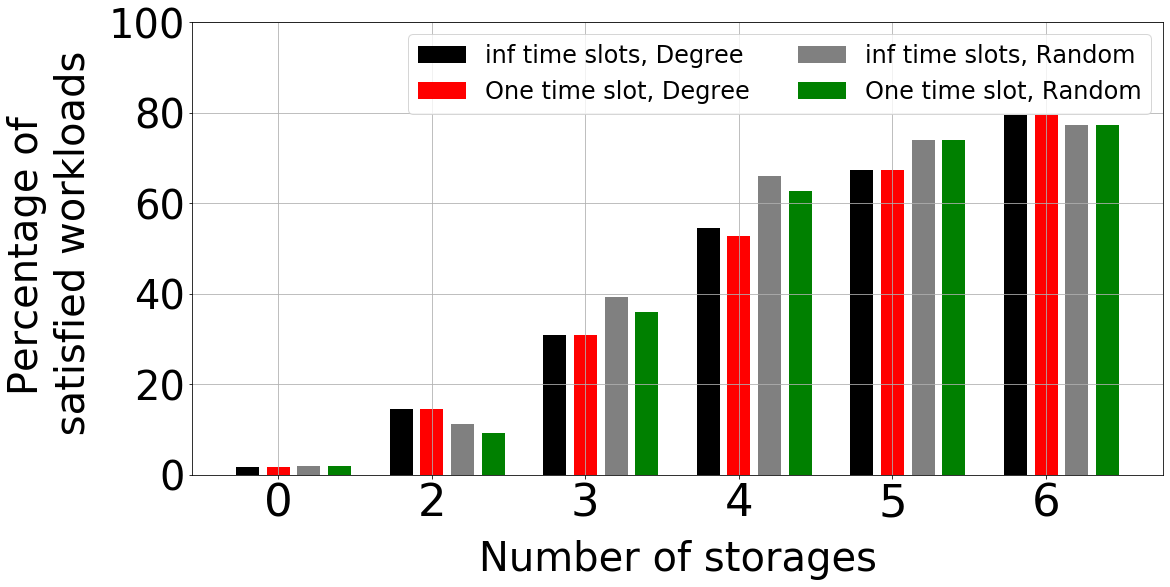

topology is G_n_p_0.05
threshold 0.65
for scheme  inf time slots, Degree
for storage 0 we have 0 satisfied from 58 available
for storage 2 we have 2 satisfied from 116 available
for storage 3 we have 4 satisfied from 58 available
for storage 4 we have 5 satisfied from 58 available
for storage 5 we have 7 satisfied from 57 available
for storage 6 we have 8 satisfied from 57 available
for scheme  One time slot, Degree
for storage 0 we have 0 satisfied from 58 available
for storage 2 we have 2 satisfied from 116 available
for storage 3 we have 4 satisfied from 58 available
for storage 4 we have 5 satisfied from 58 available
for storage 5 we have 7 satisfied from 57 available
for storage 6 we have 8 satisfied from 57 available
for scheme  inf time slots, Random
for storage 0 we have 0 satisfied from 150 available
for storage 2 we have 6 satisfied from 300 available
for storage 3 we have 12 satisfied from 150 available
for storage 4 we have 26 satisfied from 150 available
for storage 5 we h

<Figure size 576x576 with 0 Axes>

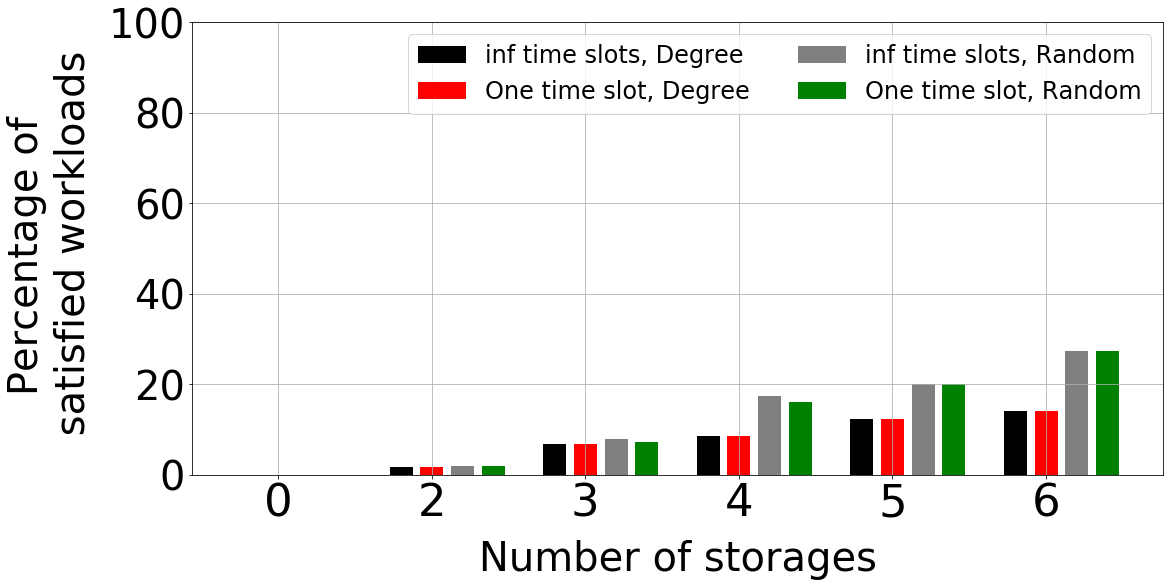

topology is ATT
threshold 0.65
for scheme  inf time slots, Degree
for storage 0 we have 0 satisfied from 50 available
for storage 2 we have 2 satisfied from 100 available
for storage 3 we have 2 satisfied from 50 available
for storage 4 we have 3 satisfied from 50 available
for storage 5 we have 3 satisfied from 50 available
for storage 6 we have 7 satisfied from 50 available
for scheme  One time slot, Degree
for storage 0 we have 0 satisfied from 50 available
for storage 2 we have 2 satisfied from 100 available
for storage 3 we have 2 satisfied from 50 available
for storage 4 we have 3 satisfied from 50 available
for storage 5 we have 3 satisfied from 50 available
for storage 6 we have 7 satisfied from 50 available
for scheme  inf time slots, Random
for storage 0 we have 0 satisfied from 50 available
for storage 2 we have 2 satisfied from 100 available
for storage 3 we have 2 satisfied from 50 available
for storage 4 we have 6 satisfied from 50 available
for storage 5 we have 9 satisf

<Figure size 576x576 with 0 Axes>

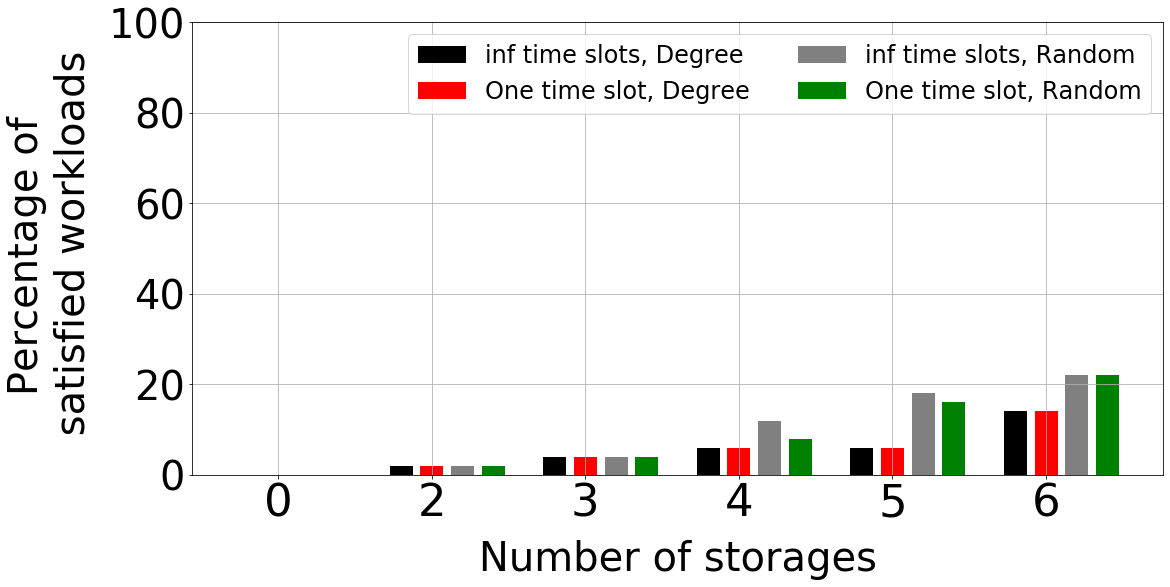

topology is Abilene
threshold 0.65
for scheme  inf time slots, Degree
for storage 0 we have 0 satisfied from 50 available
for storage 2 we have 0 satisfied from 100 available
for storage 3 we have 0 satisfied from 50 available
for storage 4 we have 1 satisfied from 50 available
for storage 5 we have 1 satisfied from 50 available
for storage 6 we have 1 satisfied from 50 available
for scheme  One time slot, Degree
for storage 0 we have 0 satisfied from 50 available
for storage 2 we have 0 satisfied from 100 available
for storage 3 we have 0 satisfied from 50 available
for storage 4 we have 1 satisfied from 50 available
for storage 5 we have 1 satisfied from 50 available
for storage 6 we have 1 satisfied from 50 available
for scheme  inf time slots, Random
for storage 0 we have 0 satisfied from 50 available
for storage 2 we have 0 satisfied from 100 available
for storage 3 we have 2 satisfied from 50 available
for storage 4 we have 3 satisfied from 50 available
for storage 5 we have 4 sa

<Figure size 576x576 with 0 Axes>

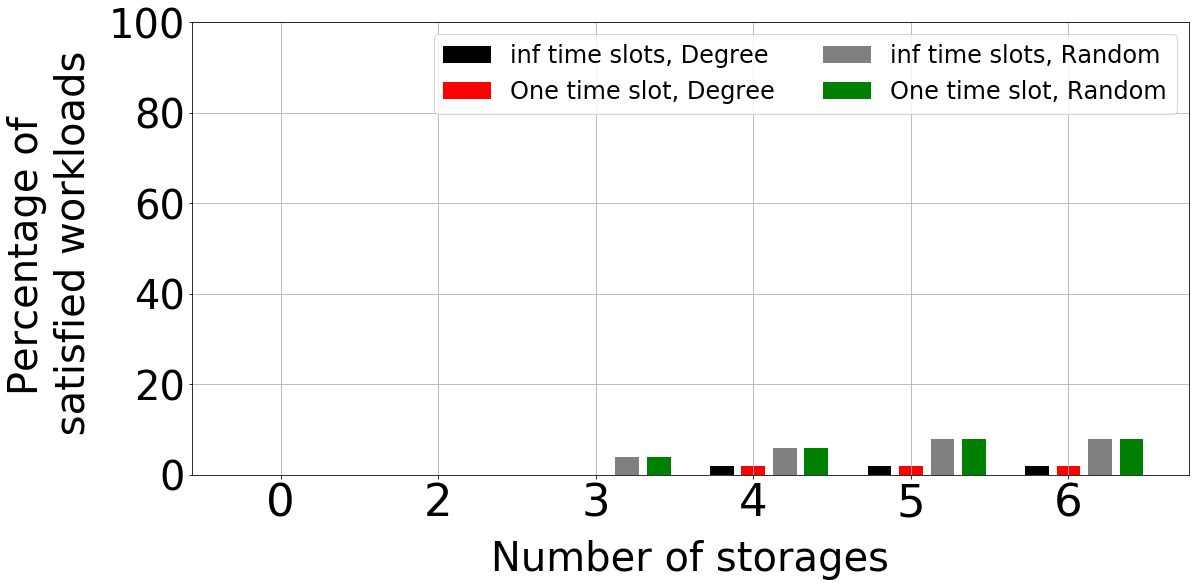

topology is G_n_m_2
threshold 0.65
for scheme  inf time slots, Degree
for storage 0 we have 0 satisfied from 50 available
for storage 2 we have 12 satisfied from 100 available
for storage 3 we have 16 satisfied from 50 available
for storage 4 we have 33 satisfied from 50 available
for storage 5 we have 46 satisfied from 50 available
for storage 6 we have 47 satisfied from 50 available
for scheme  One time slot, Degree
for storage 0 we have 0 satisfied from 50 available
for storage 2 we have 6 satisfied from 100 available
for storage 3 we have 13 satisfied from 50 available
for storage 4 we have 26 satisfied from 50 available
for storage 5 we have 41 satisfied from 50 available
for storage 6 we have 47 satisfied from 50 available
for scheme  inf time slots, Random
for storage 0 we have 0 satisfied from 150 available
for storage 2 we have 12 satisfied from 300 available
for storage 3 we have 36 satisfied from 150 available
for storage 4 we have 90 satisfied from 150 available
for storage

<Figure size 576x576 with 0 Axes>

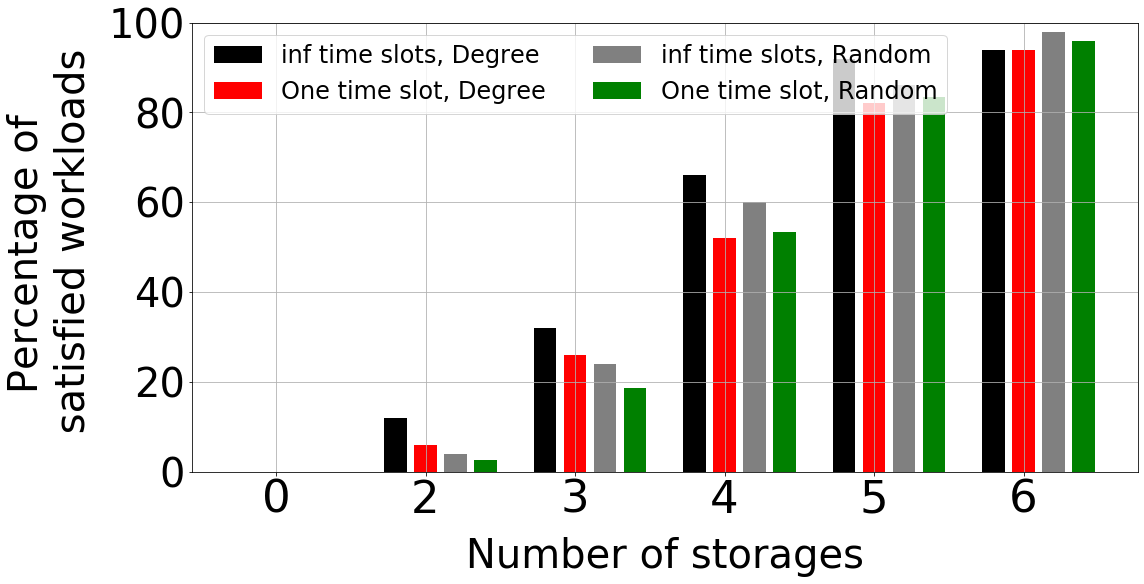

topology is G_n_m_3
threshold 0.65
for scheme  inf time slots, Degree
for storage 0 we have 1 satisfied from 50 available
for storage 2 we have 8 satisfied from 100 available
for storage 3 we have 17 satisfied from 50 available
for storage 4 we have 36 satisfied from 50 available
for storage 5 we have 46 satisfied from 50 available
for storage 6 we have 46 satisfied from 50 available
for scheme  One time slot, Degree
for storage 0 we have 1 satisfied from 50 available
for storage 2 we have 8 satisfied from 100 available
for storage 3 we have 17 satisfied from 50 available
for storage 4 we have 36 satisfied from 50 available
for storage 5 we have 46 satisfied from 50 available
for storage 6 we have 46 satisfied from 50 available
for scheme  inf time slots, Random
for storage 0 we have 4 satisfied from 150 available
for storage 2 we have 48 satisfied from 300 available
for storage 3 we have 64 satisfied from 150 available
for storage 4 we have 106 satisfied from 150 available
for storage

<Figure size 576x576 with 0 Axes>

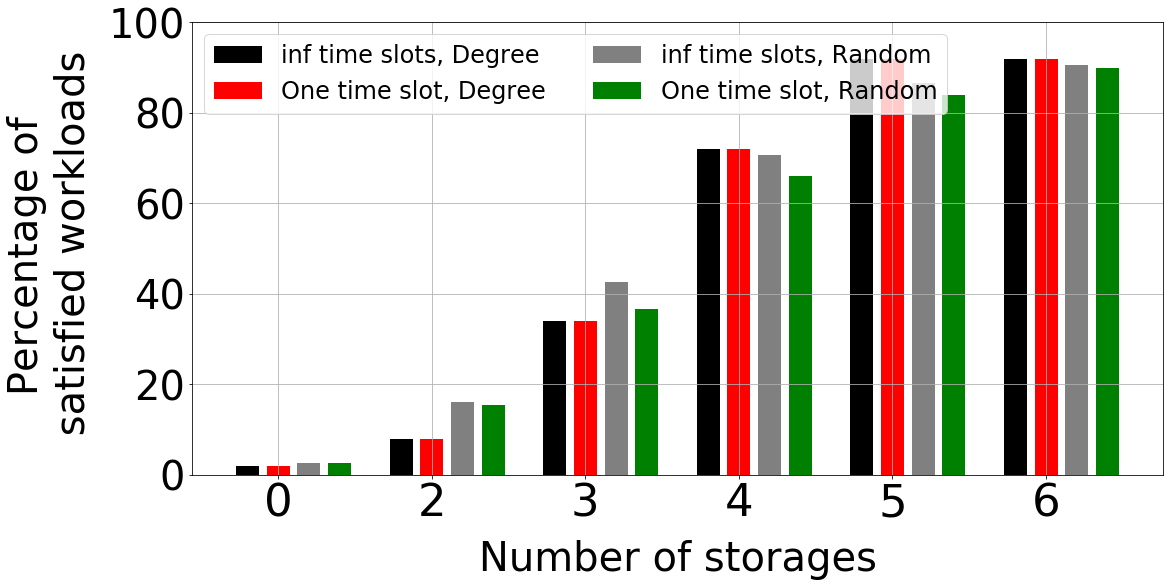

topology is SURFnet
threshold 0.65
for scheme  inf time slots, Degree
for storage 0 we have 0 satisfied from 49 available
for storage 2 we have 0 satisfied from 98 available
for storage 3 we have 0 satisfied from 49 available
for storage 4 we have 1 satisfied from 49 available
for storage 5 we have 1 satisfied from 49 available
for storage 6 we have 3 satisfied from 48 available
for scheme  One time slot, Degree
for storage 0 we have 0 satisfied from 49 available
for storage 2 we have 0 satisfied from 98 available
for storage 3 we have 0 satisfied from 49 available
for storage 4 we have 1 satisfied from 49 available
for storage 5 we have 1 satisfied from 48 available
for storage 6 we have 3 satisfied from 48 available
for scheme  inf time slots, Random
for storage 0 we have 0 satisfied from 50 available
for storage 2 we have 0 satisfied from 100 available
for storage 3 we have 1 satisfied from 50 available
for storage 4 we have 1 satisfied from 50 available
for storage 5 we have 1 sati

<Figure size 576x576 with 0 Axes>

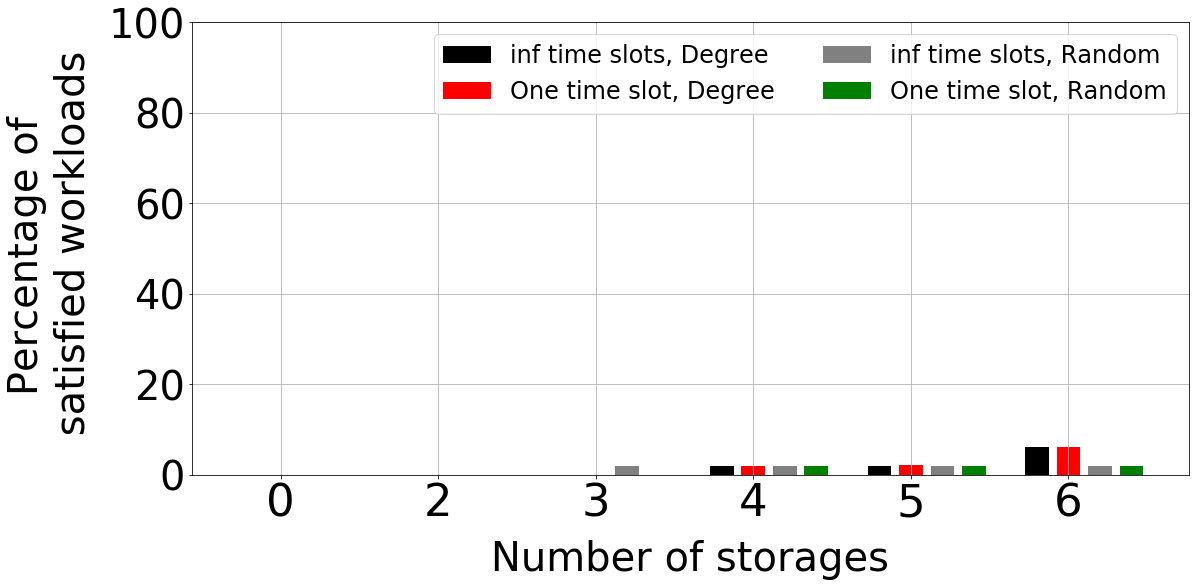

topology is IBM
threshold 0.65
for scheme  inf time slots, Degree


KeyError: 'IBM'

In [36]:

for spike_mean in [1200,250,280,350]:
    file_result_path = 'results/results_feasibility.csv'
    each_scheme_each_storage_number_satisfying , each_topology_each_storage_available,each_topology_plot_name,number_of_storages, threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_available_satisfied(file_result_path,spike_mean)


#     print(list(each_scheme_each_storage_number_satisfying.keys()))
#     print(threshold_ranges,available_networks)
    

    # print('each_scheme_each_storage_number_satisfying',each_scheme_each_storage_number_satisfying)
    # print('num_of_paths',num_of_paths)
    # print('number_of_storages',number_of_storages)
    # print("each_topology_each_storage_available",each_topology_each_storage_available)
    indx =0
    num_of_paths = [3]
    for n_path in num_of_paths:
        for storage_capacity in available_storage_capacities:
            for topology in list(available_networks):
                print("topology is",topology)
                for threshold_range in threshold_ranges:
                    print("threshold",threshold_range)
                    each_life_time_each_storage_numbers_satisfying_percentage = {}
                    each_scheme_each_storage_numbers_satisfying_percentage = {}
                    for scheme_key in each_scheme_each_storage_number_satisfying:
                        print("for scheme ",scheme_key)
                        each_scheme_each_storage_numbers_satisfying_percentage[scheme_key] = {}

                        for storage_num in number_of_storages:
        #                     print("storage nodes ",storage_num)
        #                     print(each_topology_each_storage_available[scheme_key][topology][threshold_range][n_path][storage_num])
        #                     print(each_scheme_each_storage_number_satisfying[scheme_key][topology][threshold_range][n_path][storage_num])
                            try:
                                all_solutions =each_topology_each_storage_available[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                            except ValueError:
                                print(ValueError)
                                all_solutions=0
                            try:
                                satisfied_work_loads = len(each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num])
                            except:
        #                         print(ValueError)
                                satisfied_work_loads = 0
                            satisfied_percentage = (satisfied_work_loads/all_solutions)*100
                            print("for storage %s we have %s satisfied from %s available"%(storage_num,satisfied_work_loads,all_solutions))
                            each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][storage_num] = satisfied_percentage
            #                 each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][storage_num] = 1

                    print("each_scheme_each_storage_numbers_satisfying_percentage",each_scheme_each_storage_numbers_satisfying_percentage)    
                    print("each_topologmy_plot_name",each_topology_plot_name[topology].keys())
                    plot_bar_plot("Number of storages",'Percentage of \n satisfied workloads',
                              each_scheme_each_storage_numbers_satisfying_percentage,number_of_storages,
                              "plots/"+each_topology_plot_name[topology][threshold_range][storage_capacity])
    

topology G_n_p_0.1 for scheme One time slot, Random ,threshold_range 0.65


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


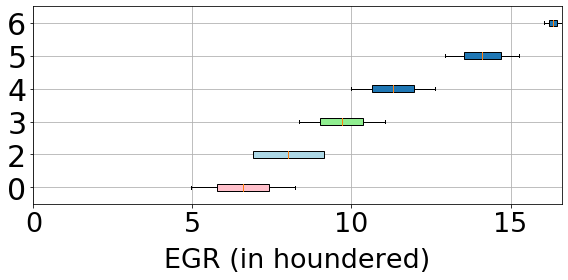

topology G_n_p_0.1 for scheme inf time slots, Random ,threshold_range 0.65


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


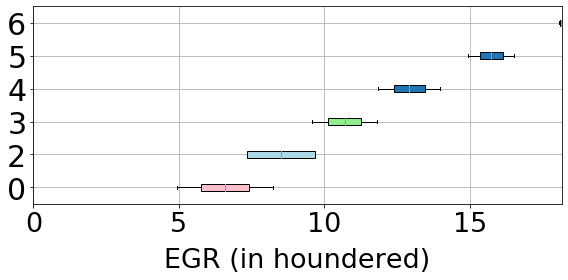

topology G_n_p_0.1 for scheme One time slot, Random ,threshold_range 0.7


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


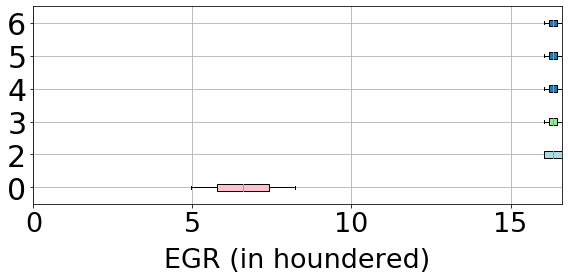

topology G_n_p_0.1 for scheme inf time slots, Random ,threshold_range 0.7


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


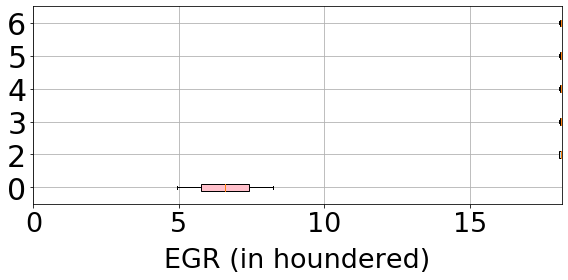

topology G_n_p_0.1 for scheme One time slot, Random ,threshold_range 0.75


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


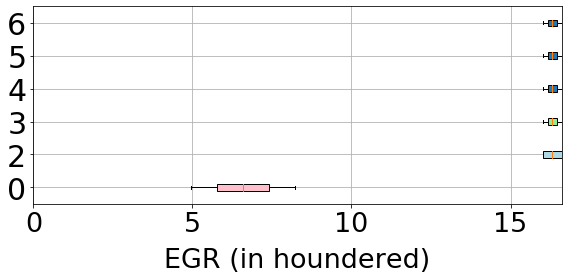

topology G_n_p_0.1 for scheme inf time slots, Random ,threshold_range 0.75


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


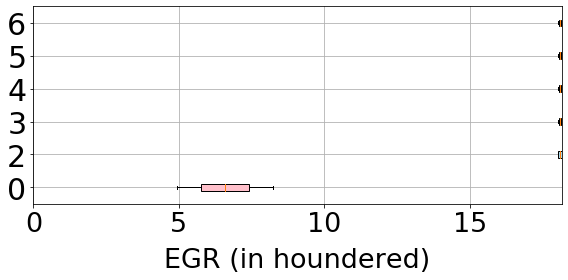

topology G_n_p_0.1 for scheme One time slot, Random ,threshold_range 0.8


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


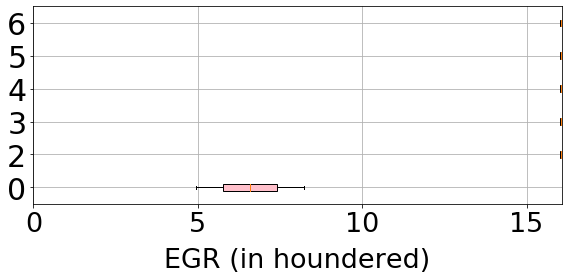

topology G_n_p_0.1 for scheme inf time slots, Random ,threshold_range 0.8


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


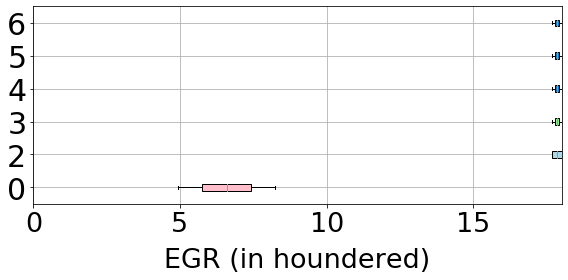

topology G_n_p_0.1 for scheme One time slot, Random ,threshold_range 0.85


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


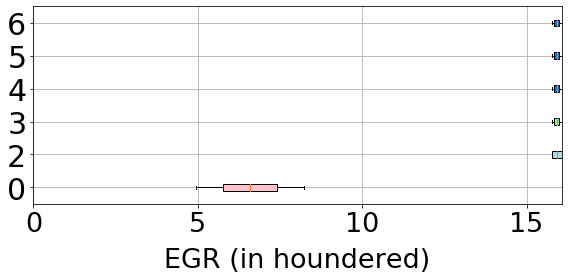

topology G_n_p_0.1 for scheme inf time slots, Random ,threshold_range 0.85


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


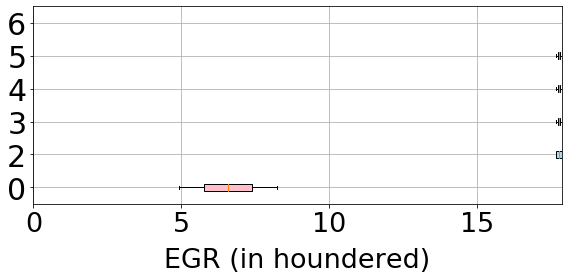

topology G_n_p_0.1 for scheme One time slot, Random ,threshold_range 0.9


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


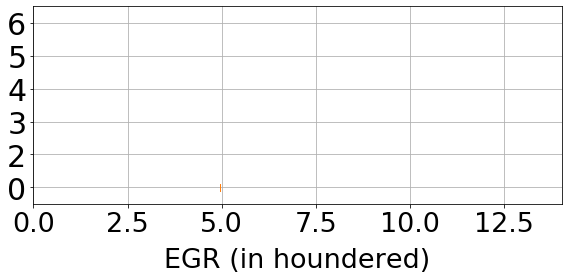

topology G_n_p_0.1 for scheme inf time slots, Random ,threshold_range 0.9


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


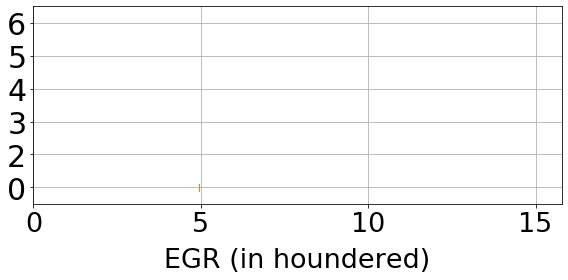

topology G_n_p_0.1 for scheme One time slot, Random ,threshold_range 0.95


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


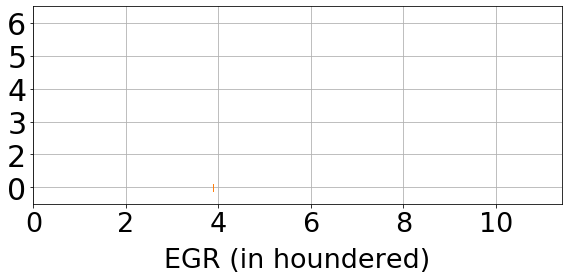

topology G_n_p_0.1 for scheme inf time slots, Random ,threshold_range 0.95


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


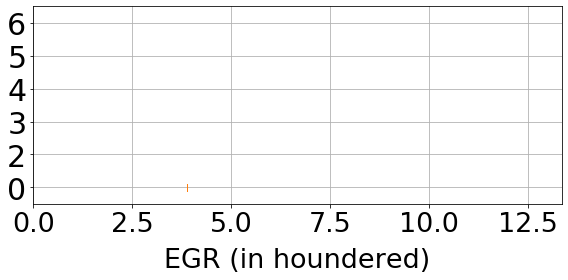

topology G_n_p_0.1 for scheme One time slot, Random ,threshold_range 0.98


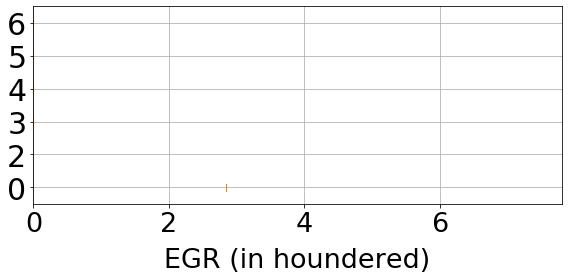

topology G_n_p_0.1 for scheme inf time slots, Random ,threshold_range 0.98


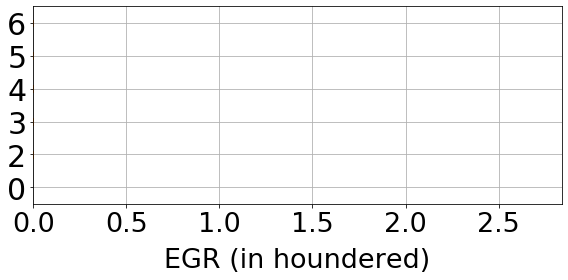

topology G_n_p_0.1 for scheme One time slot, Random ,threshold_range 1.0


KeyError: 1.0

In [23]:


for spike_mean in [300]:
#     file_result_path = '../quantum_storage/results/results_maximizing_egr_dynamic_population.csv'
    file_result_path = 'results/results_maximizing_egr_dynamic_weight.csv'
    each_scheme_each_storage_number_satisfying , each_topology_each_storage_available,each_topology_plot_name,number_of_storages, threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_available_satisfied(file_result_path,spike_mean)
    num_of_paths = [3]
    for n_path in num_of_paths:
        for storage_capacity in available_storage_capacities:
            for topology in list(available_networks):
                #print("topology is",topology)
                for threshold_range in threshold_ranges:
                    
                    for scheme_key in each_scheme_each_storage_number_satisfying:
                        print("topology %s for scheme %s ,threshold_range %s"%(topology, scheme_key,threshold_range))
                        
                        each_scheme_each_storage_number_EGR = {}
                        x_axis_max_value = 0
                        number_of_storages.sort()
                        y_axis_labels=[]
                        x_axis_data=[]
                        for storage_num in number_of_storages:
                            
                            
                            #print("for topology %s spike mean %s  capacity %s threshold %s scheme %s storage %s"
                             #    %(topology,spike_mean,storage_capacity,threshold_range,scheme_key,storage_num))
                            #print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][n_path])
                            try:
                                EGRs =each_scheme_each_storage_number_satisfying[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                            except:
                                EGRs = [0]
                            y_axis_labels.append(storage_num)
                            new_EGRs = []
                            for EGR in EGRs:
                                EGR = EGR/100
                                if EGR> x_axis_max_value:
                                    x_axis_max_value = EGR
                                new_EGRs.append(EGR)
                            x_axis_data.append(new_EGRs)
                            new_EGRs.sort()
                            #print("for storage %s we have %s"%(storage_num,new_EGRs))
                            try:
                                each_scheme_each_storage_number_EGR[topology][storage_num] = sum(EGRs)/len(EGRs)/1000
                            except:
                                each_scheme_each_storage_number_EGR[topology]={}
                                each_scheme_each_storage_number_EGR[topology][storage_num] = sum(EGRs)/len(EGRs)/1000

#                         print("x_axis_data for topollgy %s is %s"%(topology,x_axis_data))
                        horizontal_box_plat("EGR (in houndered)","",x_axis_data,y_axis_labels,x_axis_max_value,"plots/horizontal_box_plot_topology_"+each_topology_plot_name[topology][threshold_range][storage_capacity]+".pdf")
                                                                                                

available_networks ['G_n_p_0.1', 'G_n_p_0.05', 'ATT', 'G_n_m_2', 'Abilene', 'G_n_m_3', 'SURFnet', 'IBM']
each_scheme_each_storage_number_EGRs dict_keys(['One time slot, Random', 'inf time slots, Random'])
for topology G_n_p_0.1 scheme One time slot, Random storage 5 and range 0.7 we have 1604.5649125649531
for topology G_n_p_0.1 scheme One time slot, Random storage 5 and range 0.75 we have 1601.7855064632618
for topology G_n_p_0.1 scheme One time slot, Random storage 5 and range 0.8 we have 1598.5463757241928
for topology G_n_p_0.1 scheme One time slot, Random storage 5 and range 0.85 we have 1580.1988231128462
for topology G_n_p_0.1 scheme One time slot, Random storage 5 and range 0.9 we have 1476.7011089918224
for topology G_n_p_0.1 scheme One time slot, Random storage 5 and range 0.95 we have 1193.71539751374
for topology G_n_p_0.1 scheme One time slot, Random storage 5 and range 0.98 we have 750.5154780807301
for topology G_n_p_0.1 scheme One time slot, Random storage 5 and range 1

<Figure size 576x576 with 0 Axes>

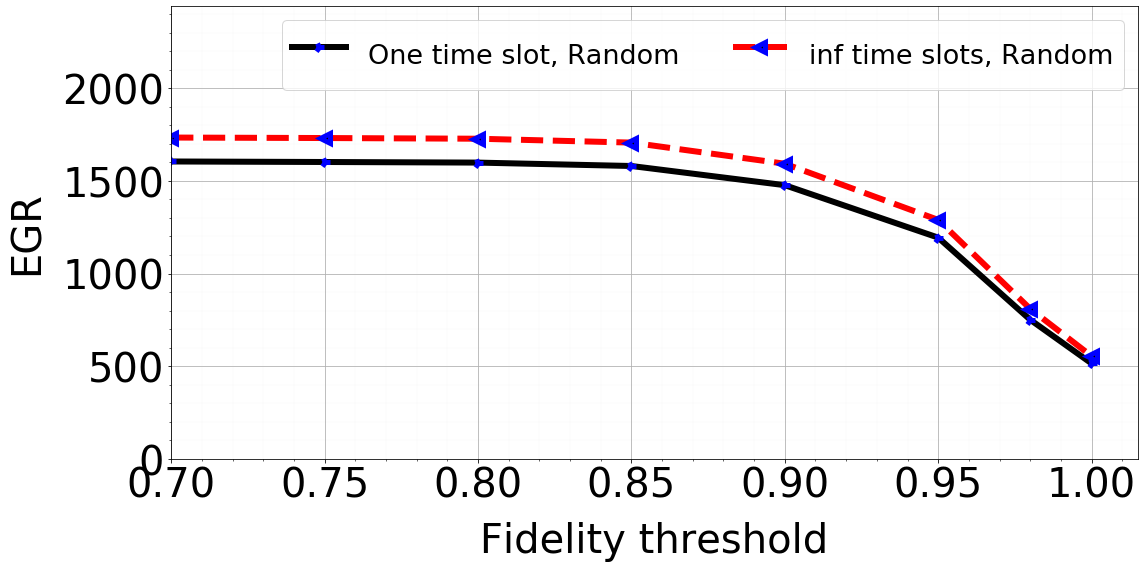

for topology G_n_p_0.05 scheme One time slot, Random storage 5 and range 0.7 we have 874.4246377886345
for topology G_n_p_0.05 scheme One time slot, Random storage 5 and range 0.75 we have 844.464958215351
for topology G_n_p_0.05 scheme One time slot, Random storage 5 and range 0.8 we have 829.336095479097
for topology G_n_p_0.05 scheme One time slot, Random storage 5 and range 0.85 we have 776.9562726196679
for topology G_n_p_0.05 scheme One time slot, Random storage 5 and range 0.9 we have 670.1128252866265
for topology G_n_p_0.05 scheme One time slot, Random storage 5 and range 0.95 we have 514.945338463596
for topology G_n_p_0.05 scheme One time slot, Random storage 5 and range 0.98 we have 362.9290328189033
for topology G_n_p_0.05 scheme One time slot, Random storage 5 and range 1.0 we have 282.67552838536744
for topology G_n_p_0.05 scheme inf time slots, Random storage 5 and range 0.7 we have 984.8909880011628
for topology G_n_p_0.05 scheme inf time slots, Random storage 5 and ra

<Figure size 576x576 with 0 Axes>

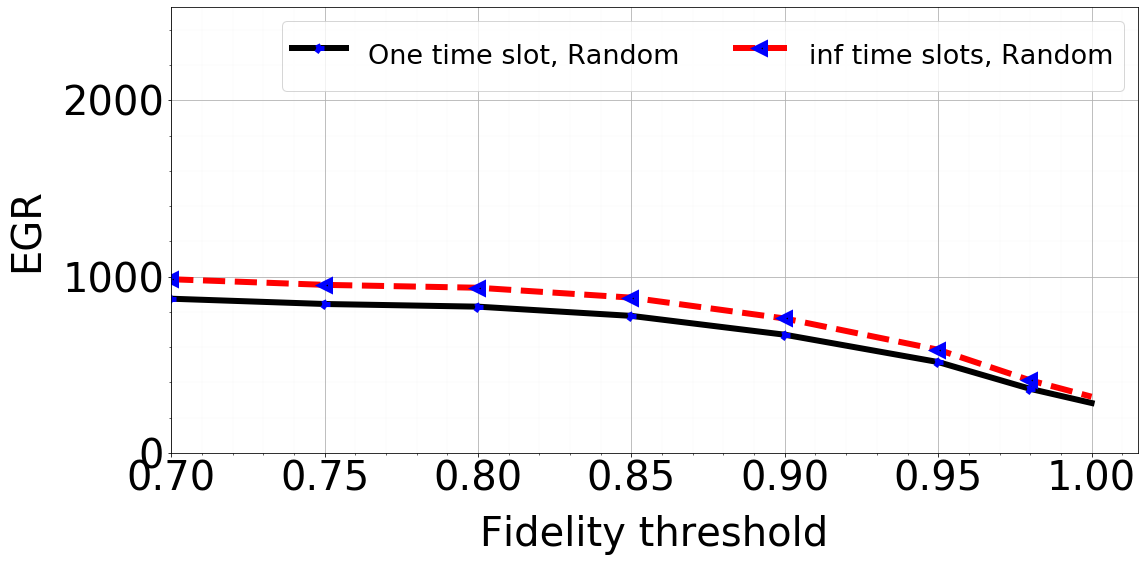

for topology ATT scheme One time slot, Random storage 5 and range 0.7 we have 911.4994187224052
for topology ATT scheme One time slot, Random storage 5 and range 0.75 we have 911.4847919271182
for topology ATT scheme One time slot, Random storage 5 and range 0.8 we have 911.3789746357716
for topology ATT scheme One time slot, Random storage 5 and range 0.85 we have 910.8575184171042
for topology ATT scheme One time slot, Random storage 5 and range 0.9 we have 900.6943958742444
for topology ATT scheme One time slot, Random storage 5 and range 0.95 we have 798.3501722241027
for topology ATT scheme One time slot, Random storage 5 and range 0.98 we have 504.1040165140401
for topology ATT scheme One time slot, Random storage 5 and range 1.0 we have 313.2713630888624
for topology ATT scheme inf time slots, Random storage 5 and range 0.7 we have 941.1199906033041
for topology ATT scheme inf time slots, Random storage 5 and range 0.75 we have 941.1102293142652
for topology ATT scheme inf time 

<Figure size 576x576 with 0 Axes>

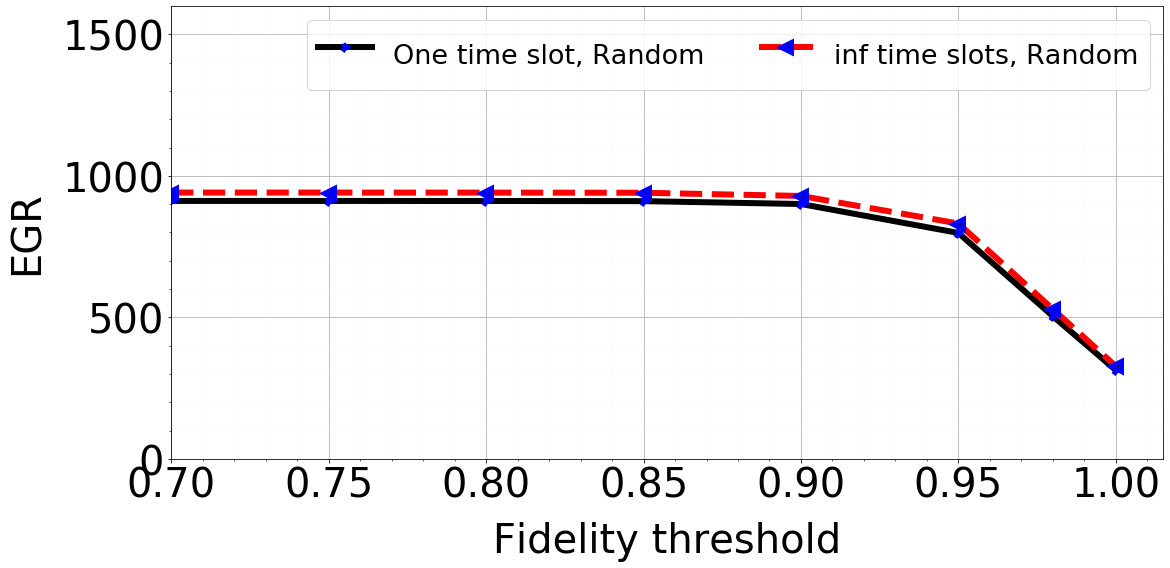

for topology G_n_m_2 scheme One time slot, Random storage 5 and range 0.7 we have 1474.0902086070262
for topology G_n_m_2 scheme One time slot, Random storage 5 and range 0.75 we have 1472.0024113317763
for topology G_n_m_2 scheme One time slot, Random storage 5 and range 0.8 we have 1471.7375308234728
for topology G_n_m_2 scheme One time slot, Random storage 5 and range 0.85 we have 1449.3755199337604
for topology G_n_m_2 scheme One time slot, Random storage 5 and range 0.9 we have 1355.1731750014515
for topology G_n_m_2 scheme One time slot, Random storage 5 and range 0.95 we have 1076.6137302698523
for topology G_n_m_2 scheme One time slot, Random storage 5 and range 0.98 we have 655.1160665726657
for topology G_n_m_2 scheme One time slot, Random storage 5 and range 1.0 we have 444.1527937006283
for topology G_n_m_2 scheme inf time slots, Random storage 5 and range 0.7 we have 1706.588831939618
for topology G_n_m_2 scheme inf time slots, Random storage 5 and range 0.75 we have 1703.

<Figure size 576x576 with 0 Axes>

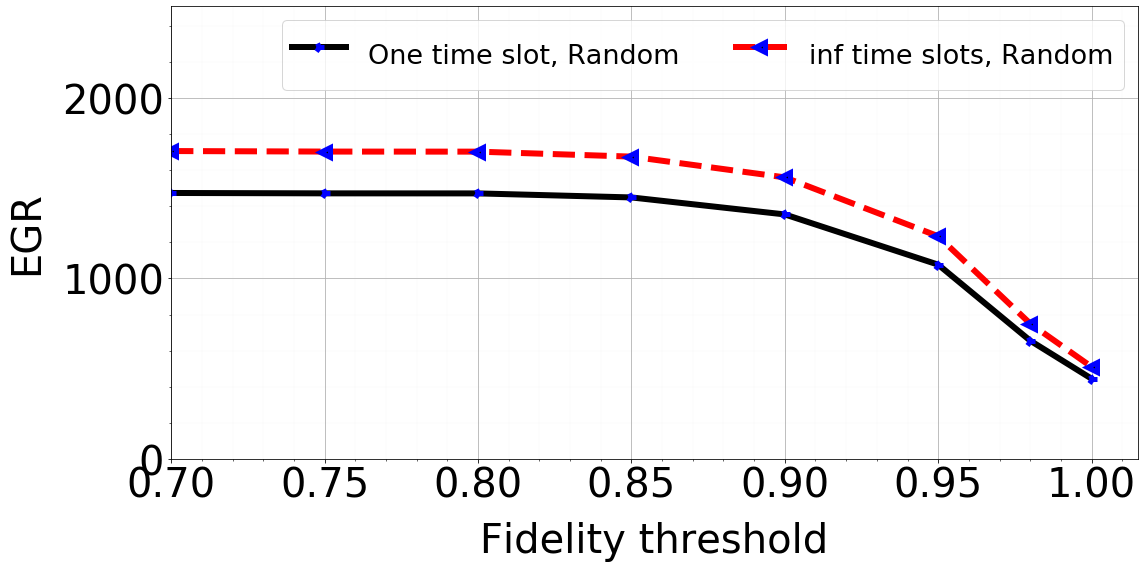

for topology Abilene scheme One time slot, Random storage 5 and range 0.7 we have 527.4408953866887
for topology Abilene scheme One time slot, Random storage 5 and range 0.75 we have 525.9335758449798
for topology Abilene scheme One time slot, Random storage 5 and range 0.8 we have 524.0842592042296
for topology Abilene scheme One time slot, Random storage 5 and range 0.85 we have 521.2570629573866
for topology Abilene scheme One time slot, Random storage 5 and range 0.9 we have 500.4409363871622
for topology Abilene scheme One time slot, Random storage 5 and range 0.95 we have 450.14602439442746
for topology Abilene scheme One time slot, Random storage 5 and range 0.98 we have 280.3909374448418
for topology Abilene scheme One time slot, Random storage 5 and range 1.0 we have 173.27120891629963
for topology Abilene scheme inf time slots, Random storage 5 and range 0.7 we have 580.958423104435
for topology Abilene scheme inf time slots, Random storage 5 and range 0.75 we have 579.620710

<Figure size 576x576 with 0 Axes>

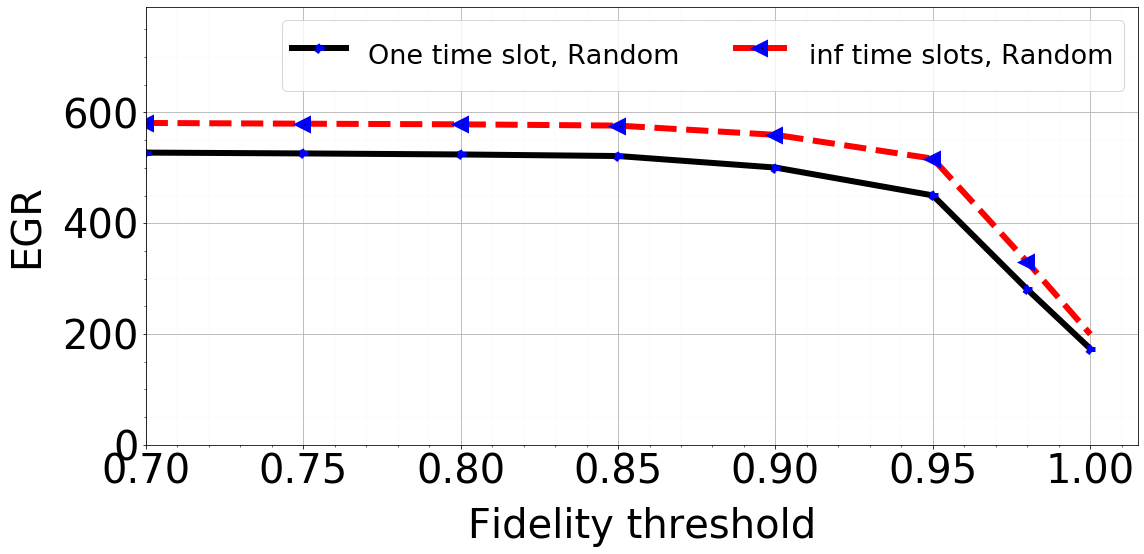

for topology G_n_m_3 scheme One time slot, Random storage 5 and range 0.7 we have 1664.098654832385
for topology G_n_m_3 scheme One time slot, Random storage 5 and range 0.75 we have 1663.0405518546124
for topology G_n_m_3 scheme One time slot, Random storage 5 and range 0.8 we have 1660.4753829442514
for topology G_n_m_3 scheme One time slot, Random storage 5 and range 0.85 we have 1655.9763923511684
for topology G_n_m_3 scheme One time slot, Random storage 5 and range 0.9 we have 1594.541877613346
for topology G_n_m_3 scheme One time slot, Random storage 5 and range 0.95 we have 1342.8700390867937
for topology G_n_m_3 scheme One time slot, Random storage 5 and range 0.98 we have 825.0352124825401
for topology G_n_m_3 scheme One time slot, Random storage 5 and range 1.0 we have 541.594964507159
for topology G_n_m_3 scheme inf time slots, Random storage 5 and range 0.7 we have 1893.6111016181208
for topology G_n_m_3 scheme inf time slots, Random storage 5 and range 0.75 we have 1892.60

<Figure size 576x576 with 0 Axes>

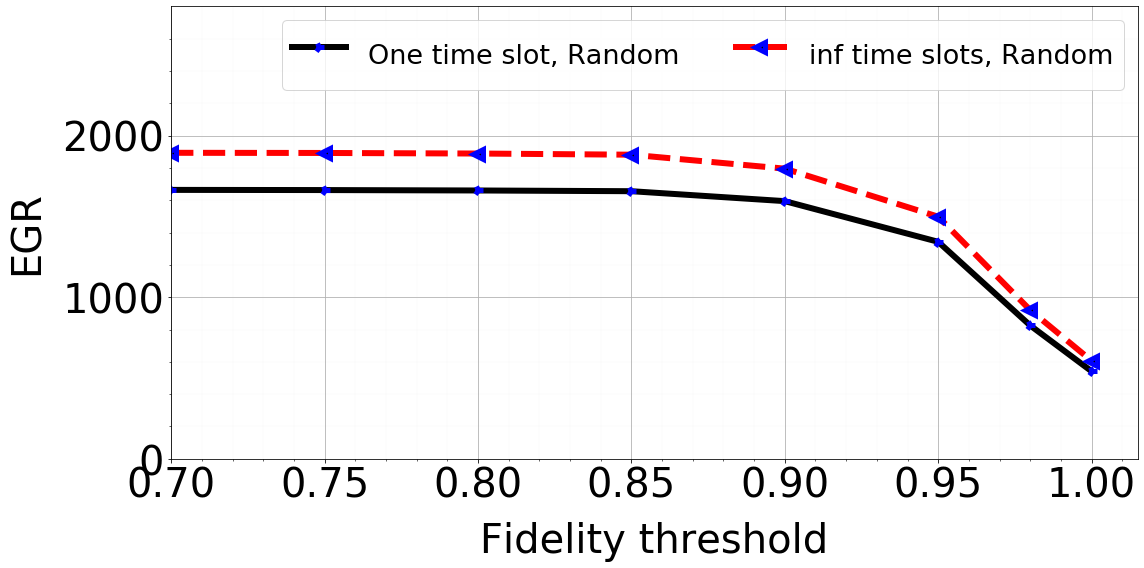

for topology SURFnet scheme One time slot, Random storage 5 and range 0.7 we have 758.6541991343855
for topology SURFnet scheme One time slot, Random storage 5 and range 0.75 we have 733.0518133792964
for topology SURFnet scheme One time slot, Random storage 5 and range 0.8 we have 706.2349549119062
for topology SURFnet scheme One time slot, Random storage 5 and range 0.85 we have 668.4784701835482
for topology SURFnet scheme One time slot, Random storage 5 and range 0.9 we have 591.8167628357625
for topology SURFnet scheme One time slot, Random storage 5 and range 0.95 we have 461.39125546992676
for topology SURFnet scheme One time slot, Random storage 5 and range 0.98 we have 359.54561910971125
for topology SURFnet scheme One time slot, Random storage 5 and range 1.0 we have 303.55533523022257
for topology SURFnet scheme inf time slots, Random storage 5 and range 0.7 we have 827.4236107869868
for topology SURFnet scheme inf time slots, Random storage 5 and range 0.75 we have 803.8258

<Figure size 576x576 with 0 Axes>

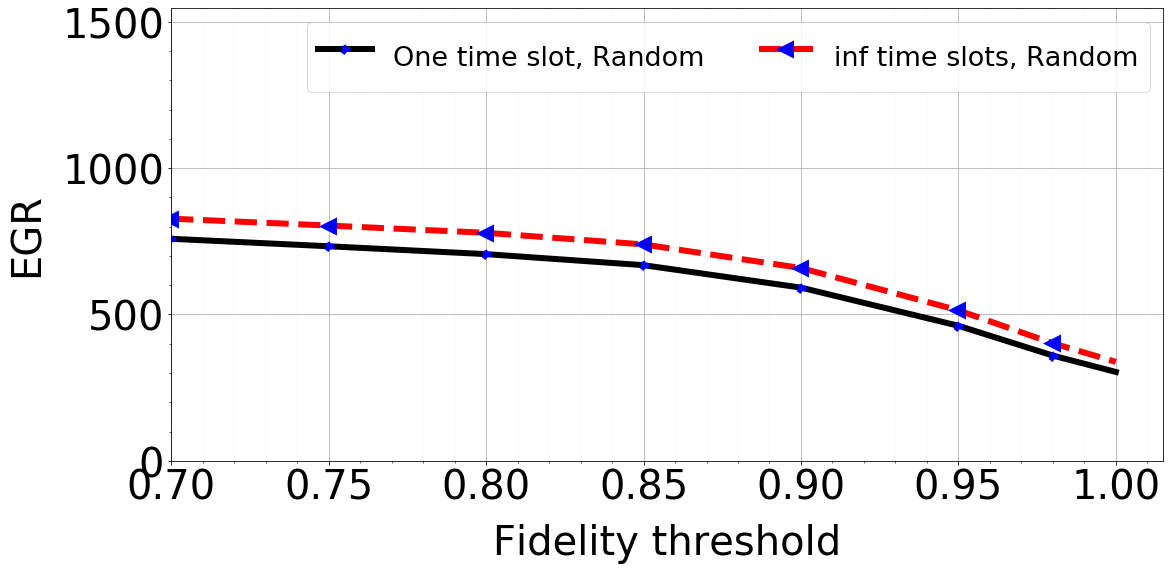

for topology IBM scheme One time slot, Random storage 5 and range 0.7 we have 686.5109220348234
for topology IBM scheme One time slot, Random storage 5 and range 0.75 we have 684.799764225129
for topology IBM scheme One time slot, Random storage 5 and range 0.8 we have 684.1154761518055
for topology IBM scheme One time slot, Random storage 5 and range 0.85 we have 679.7652612914171
for topology IBM scheme One time slot, Random storage 5 and range 0.9 we have 650.3599115254214
for topology IBM scheme One time slot, Random storage 5 and range 0.95 we have 532.5500958573077
for topology IBM scheme One time slot, Random storage 5 and range 0.98 we have 334.92111145405545
for topology IBM scheme One time slot, Random storage 5 and range 1.0 we have 216.07930966425346
for topology IBM scheme inf time slots, Random storage 5 and range 0.7 we have 741.0381150381895
for topology IBM scheme inf time slots, Random storage 5 and range 0.75 we have 740.1970742697237
for topology IBM scheme inf time

<Figure size 576x576 with 0 Axes>

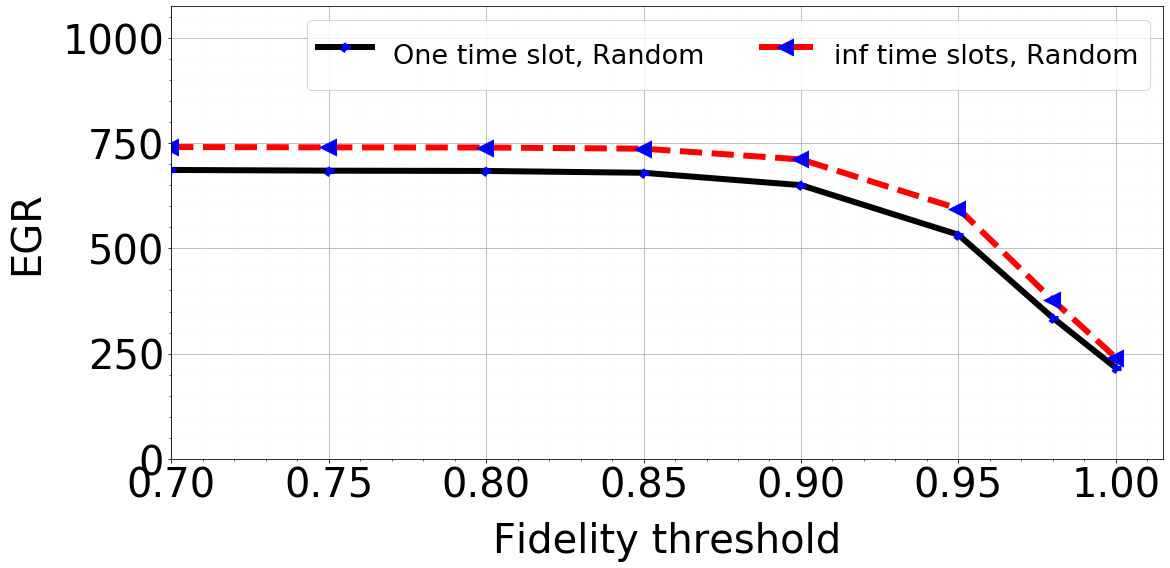

In [32]:
for spike_mean in [300]:
    file_result_path = 'results/results_maximizing_egr_dynamic_weight.csv'
    each_scheme_each_storage_number_EGRs ,each_topology_plot_name,number_of_storages,threshold_ranges,available_networks,available_storage_capacities = get_each_scheme_EGR(file_result_path,spike_mean)
    print("available_networks",available_networks)
    # print("each_scheme_each_storage_number_satisfying",each_scheme_each_storage_number_satisfying)
    print("each_scheme_each_storage_number_EGRs",each_scheme_each_storage_number_EGRs.keys())
    

    indx =0
    num_of_paths = [3]
    threshold_ranges.sort()
    for n_path in num_of_paths:
        for storage_num in [5]:
            for topology in list(available_networks):
                #print("topology is",topology)
                for storage_capacity in available_storage_capacities:
                    each_scheme_each_storage_numbers_avg_EGRs = {}
                    schemes_title_in_order = []
                    max_value_on_y_axis = 0
                    selected_thresholds = []
                    for scheme_key in each_scheme_each_storage_number_EGRs:
                        #print("for scheme ",scheme_key)
                        for threshold_range in threshold_ranges:
                            if threshold_range>0.65:
                                if threshold_range not in selected_thresholds:
                                    selected_thresholds.append(threshold_range)
                                #print("threshold",threshold_range)
                                if scheme_key not in schemes_title_in_order:
                                    schemes_title_in_order.append(scheme_key)


                                try:
                                    EGRs = each_scheme_each_storage_number_EGRs[scheme_key][topology][storage_capacity][threshold_range][n_path][storage_num]
                                except:
            #                         print(ValueError)
                                    EGRs = [0]
                                if max(EGRs)>max_value_on_y_axis:
                                    max_value_on_y_axis = max(EGRs)
                                avg_EGRs = sum(EGRs)/len(EGRs)
                                try:
                                    each_scheme_each_storage_numbers_avg_EGRs[scheme_key][threshold_range] = avg_EGRs
                                except:
                                    each_scheme_each_storage_numbers_avg_EGRs[scheme_key]={}
                                    each_scheme_each_storage_numbers_avg_EGRs[scheme_key][threshold_range] = avg_EGRs
                                print("for topology %s scheme %s storage %s and range %s we have %s"%
                                      (topology, scheme_key,storage_num,threshold_range,avg_EGRs))
                                #time.sleep(3)
                #                 each_scheme_each_storage_numbers_satisfying_percentage[scheme_key][storage_num] = 1

        #         print("each_scheme_each_storage_numbers_satisfying_percentage",each_scheme_each_storage_numbers_satisfying_percentage)    
                    selected_thresholds.sort()
#                     for scheme in schemes_title_in_order:
#                         for threshold_range in threshold_ranges:
#                             print("for scheme %s range %s we have %s "%(scheme,threshold_range,each_scheme_each_storage_numbers_satisfying_percentage[scheme][threshold_range]))
#                             print(threshold_range,each_scheme_each_storage_numbers_satisfying_percentage[scheme].keys())
                    ploting_simple_y_as_x("Fidelity threshold",'EGR',
                                          min(selected_thresholds),max_value_on_y_axis,
                                          list(schemes_title_in_order),
                                          each_scheme_each_storage_numbers_avg_EGRs,
                                          selected_thresholds,selected_thresholds,
                                          False,"plots/EGR_as_threshold_range_"+topology+"_"+str(spike_mean)+"_"+str(storage_capacity)+".pdf")

